In [43]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hijest_genre_classification_dataset_imdb_path = kagglehub.dataset_download('hijest/genre-classification-dataset-imdb')

print('Data source import complete.')


Data source import complete.


The upper two block of code are used to import the dataset and are predifined by kaggle and google colab. so I didnt interfere with it

# Movie Genre Classification
## Importing important Libraries

In [44]:
print(hijest_genre_classification_dataset_imdb_path)

/kaggle/input/genre-classification-dataset-imdb


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [46]:
trainPath = "/root/.cache/kagglehub/datasets/hijest/genre-classification-dataset-imdb/versions/1/Genre Classification Dataset/train_data.txt"
trainData = pd.read_csv(trainPath, sep=':::', names=['Title', 'Genre', 'Description'], engine = 'python')
trainData.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [47]:
testPath = "/root/.cache/kagglehub/datasets/hijest/genre-classification-dataset-imdb/versions/1/Genre Classification Dataset/test_data.txt"
testData = pd.read_csv(testPath, sep=':::', names=['Id', 'Title', 'Description'], engine='python', index_col = 'Id')
testData.head()

,Title,Description
Id,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [48]:
testSolPath = "/root/.cache/kagglehub/datasets/hijest/genre-classification-dataset-imdb/versions/1/Genre Classification Dataset/test_data_solution.txt"
testSolData = pd.read_csv(testSolPath, sep=':::', names=['Title', 'Genre', 'Description'], engine = 'python')
testSolData.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


Checking for null values in the data and some other informations about it

In [49]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [50]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [51]:
testSolData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Downloading the NLTK Packages

In [52]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

CLeaning the data for training and testing

In [54]:
def clean_text_characters(text):
    if isinstance(text, str):
        # Remove numbers, punctuation, and symbols
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Optionally, convert to lowercase here or in remove_stopwords
        text = text.lower()
        return text
    return ""

def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

def lemmatize_text(text):
    words = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(words)

trainData['Description'] = trainData['Description'].apply(clean_text_characters).apply(remove_stopwords).apply(lemmatize_text)
testData['Description'] = testData['Description'].apply(clean_text_characters).apply(remove_stopwords).apply(lemmatize_text)
testSolData['Description'] = testSolData['Description'].apply(clean_text_characters).apply(remove_stopwords).apply(lemmatize_text)

Reviewing the data after cleaning

In [55]:
trainData.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening conversation doctor parent yearold o...
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...
4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...
5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...


In [56]:
testData.head()

,Title,Description
Id,,
1,Edgar's Lunch (1998),lr brane love life car apartment job especiall...
2,La guerra de papá (1977),spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),one year life albin family shepherd north tran...
4,Meu Amigo Hindu (2015),father died hasnt spoken brother year serious ...
5,Er nu zhai (1955),known internationally martial art superstar br...


In [57]:
testSolData.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,lr brane love life car apartment job especiall...
2,La guerra de papá (1977),comedy,spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),documentary,one year life albin family shepherd north tran...
4,Meu Amigo Hindu (2015),drama,father died hasnt spoken brother year serious ...
5,Er nu zhai (1955),drama,known internationally martial art superstar br...


## Using TfidfVectorizer here *only* on Description column

In [58]:
vector = TfidfVectorizer()

X_train_tfidf = vector.fit_transform(trainData['Description'])

X_test_tfidf = vector.transform(testData['Description'])

y_train = trainData['Genre'] # labels

I am using Logistic Regression here

In [59]:
model = LogisticRegression(max_iter=5000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [60]:
predictions = model.predict(X_test_tfidf)
y_test_true = testSolData['Genre']

In [61]:
print("\nEvaluating model predictions against TestSolutionData:")
print("Test Accuracy:", accuracy_score(y_test_true, predictions))
print("Test Classification Report:\n", classification_report(y_test_true, predictions))


Evaluating model predictions against TestSolutionData:
Test Accuracy: 0.4918081180811808
Test Classification Report:
                precision    recall  f1-score   support

      action        0.34      0.51      0.41      1314
       adult        0.37      0.67      0.48       590
   adventure        0.24      0.34      0.28       775
   animation        0.20      0.28      0.23       498
   biography        0.05      0.11      0.07       264
      comedy        0.60      0.47      0.53      7446
       crime        0.15      0.38      0.22       505
 documentary        0.79      0.60      0.68     13096
       drama        0.70      0.41      0.52     13612
      family        0.17      0.33      0.22       783
     fantasy        0.16      0.28      0.20       322
   game-show        0.63      0.73      0.67       193
     history        0.09      0.23      0.13       243
      horror        0.55      0.67      0.61      2204
       music        0.37      0.74      0.49       731


since the accuracy is really low in Logistic Regression

We will using Navies Bayes for model training

In [62]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)

In [63]:
print("\nEvaluating Multinomial Naive Bayes:")
print("Test Accuracy:", accuracy_score(y_test_true, nb_predictions))
print("Test Classification Report:\n", classification_report(y_test_true, nb_predictions, zero_division=0))


Evaluating Multinomial Naive Bayes:
Test Accuracy: 0.44142066420664205
Test Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.73      0.04      0.07      7446
       crime        0.00      0.00      0.00       505
 documentary        0.52      0.90      0.66     13096
       drama        0.38      0.87      0.53     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical      

The navies bayes came out to be even worse with accuracy score and other score checkers than the Logistic Regression.


So I am using Support Vector Machine for hopefully better test results

In [71]:
svm_model = LinearSVC(max_iter=5000)
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

In [72]:
print("\nEvaluating Linear SVC:")
print("Test Accuracy:", accuracy_score(y_test_true, svm_predictions))
print("Test Classification Report:\n", classification_report(y_test_true, svm_predictions))


Evaluating Linear SVC:
Test Accuracy: 0.5819557195571956
Test Classification Report:
                precision    recall  f1-score   support

      action        0.42      0.34      0.38      1314
       adult        0.66      0.44      0.53       590
   adventure        0.51      0.22      0.31       775
   animation        0.42      0.14      0.22       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.58      0.56      7446
       crime        0.22      0.05      0.09       505
 documentary        0.68      0.82      0.75     13096
       drama        0.56      0.71      0.63     13612
      family        0.39      0.15      0.22       783
     fantasy        0.38      0.08      0.14       322
   game-show        0.79      0.62      0.69       193
     history        0.19      0.02      0.03       243
      horror        0.61      0.64      0.62      2204
       music        0.62      0.52      0.57       731
     musical        0.32      0.

Well the SVM (Support vector machine) did improve a lot but test results are still not good enough

Accuracy of each model below:
- Logistic Regression - 49%
- Naive Bayes - 44%
- SVM - 58%

Well I think such results are procured because of the imbalance in the dataset.
Few Genres like drama and documentory are occuring too many times compared to others.

I am plotting a graph below for context

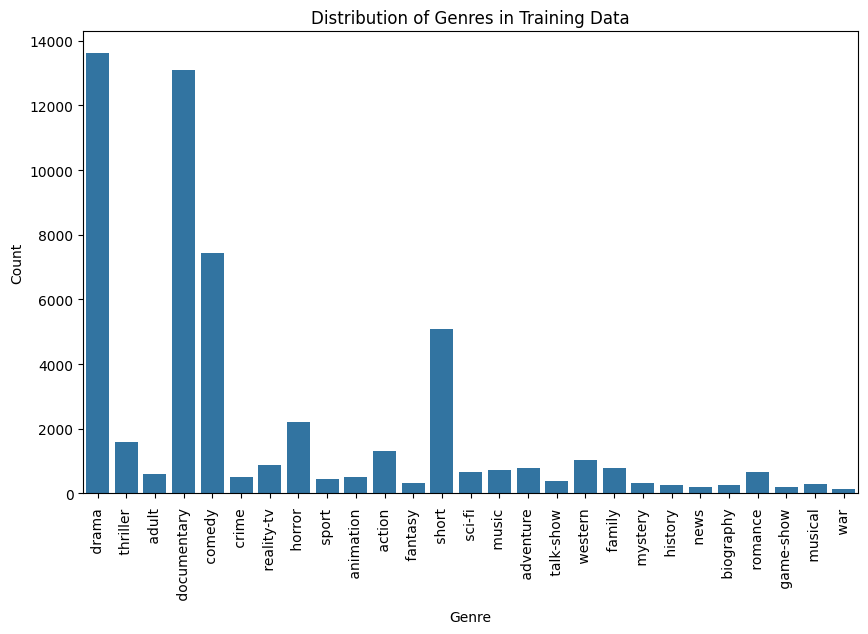

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=trainData, x='Genre')
plt.title('Distribution of Genres in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

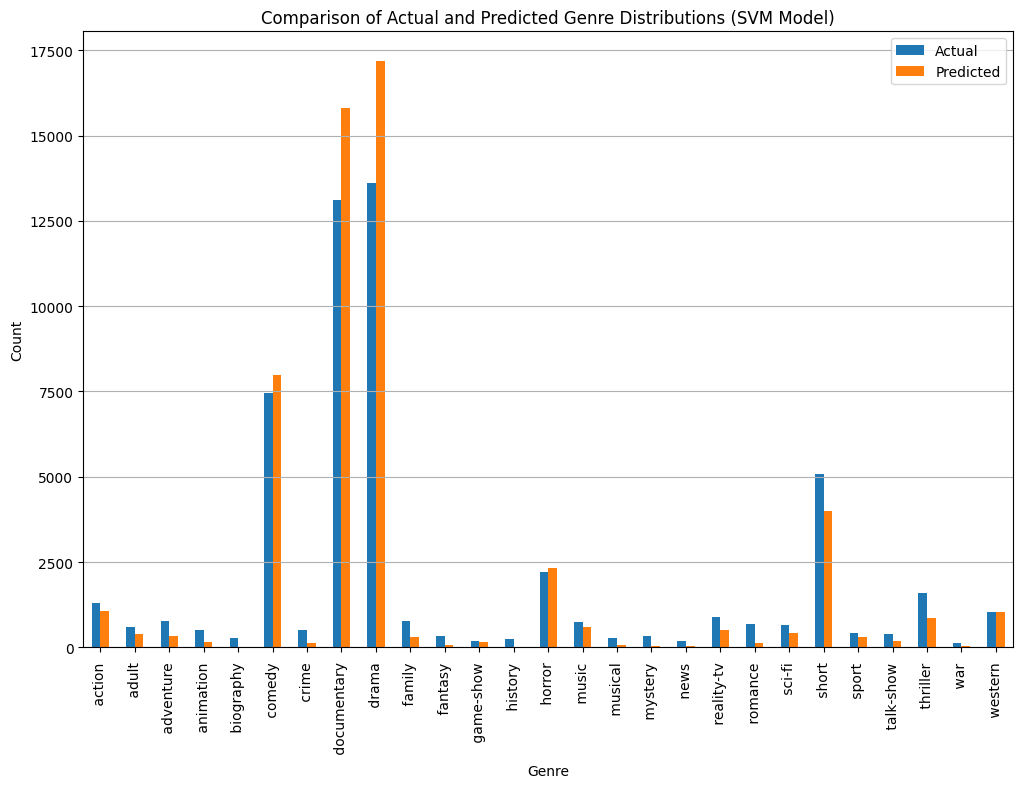

In [74]:
actual_counts = y_test_true.value_counts()
predicted_counts = pd.Series(svm_predictions).value_counts()

comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).fillna(0)

comparison_df = comparison_df.sort_index()

comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Actual and Predicted Genre Distributions (SVM Model)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()